In [1]:
import numpy as np
import pandas as pd

# Read in csv file of raw record
df_raw = pd.read_csv("./data/tmdb_5000_features.csv")

# Delete unwanted features, features: language cast_num cast_0 crew_num director genre_0 campany_0 country
df =  df_raw[['language', 'cast_num', 'cast_0', 'crew_num', 'director', 'genre_0', 'company_0', 'country']]
df.head()

,language,cast_num,cast_0,crew_num,director,genre_0,company_0,country
0,en,83,Sam Worthington,153,James Cameron,Action,Ingenious Film Partners,US
1,en,34,Johnny Depp,32,Gore Verbinski,Adventure,Walt Disney Pictures,US
2,en,83,Daniel Craig,155,Sam Mendes,Action,Columbia Pictures,GB
3,en,158,Christian Bale,217,Christopher Nolan,Action,Legendary Pictures,US
4,en,27,Taylor Kitsch,132,Andrew Stanton,Action,Walt Disney Pictures,US


# Visualization: cast_num

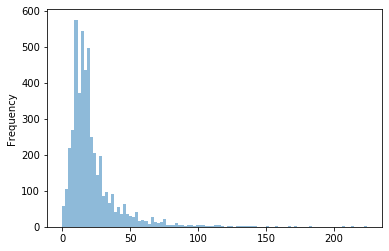

In [19]:
df['cast_num'].plot.hist(bins=100, alpha=0.5)

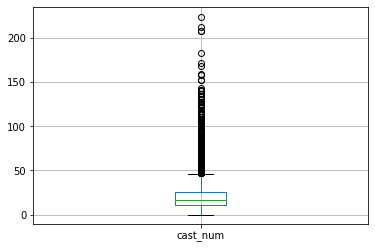

In [4]:
df.boxplot(column = ['cast_num'])

### Use percentiles to divide the data into 4 buckets

In [5]:
np.median(df['cast_num'])

17.0

In [14]:
print(np.percentile(df['cast_num'], 25))
print(np.percentile(df['cast_num'], 50))
print(np.percentile(df['cast_num'], 75))

11.0
17.0
25.0


In [16]:
# compute bucket
cast_bucket = []
for i in df['cast_num']:
    if i in range(25):
        cast_bucket.append(0)
    elif i in range(25, 50):
        cast_bucket.append(1)
    elif i in range(50, 75):
        cast_bucket.append(2)
    else:
        cast_bucket.append(3)
df['cast_bucket'] = cast_bucket
df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,language,cast_num,cast_0,crew_num,director,genre_0,company_0,country,cast_bucket
0,en,83,Sam Worthington,153,James Cameron,Action,Ingenious Film Partners,US,3
1,en,34,Johnny Depp,32,Gore Verbinski,Adventure,Walt Disney Pictures,US,1
2,en,83,Daniel Craig,155,Sam Mendes,Action,Columbia Pictures,GB,3
3,en,158,Christian Bale,217,Christopher Nolan,Action,Legendary Pictures,US,3
4,en,27,Taylor Kitsch,132,Andrew Stanton,Action,Walt Disney Pictures,US,1


In [21]:
# df.to_csv('output/cast_bucket.csv', index=False)